### Dataset link: https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil

### Import the necessary library

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
df = pd.read_csv('amazon.csv', encoding="iso-8859-1", parse_dates=['date'])

### 1. Display Top 5 Rows of The Dataset

In [3]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


### 2. Check Last 5 Rows

In [4]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [5]:
print("Shape of the Dataset", df.shape)
print("Number of rows", df.shape[0])
print("Number of columns", df.shape[1])

Shape of the Dataset (6454, 5)
Number of rows 6454
Number of columns 5


### 4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


### 5. Check For Duplicate Data and Drop Them

In [7]:
df.duplicated().sum()

32

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

### 6. Check Null Values In The Dataset

In [10]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

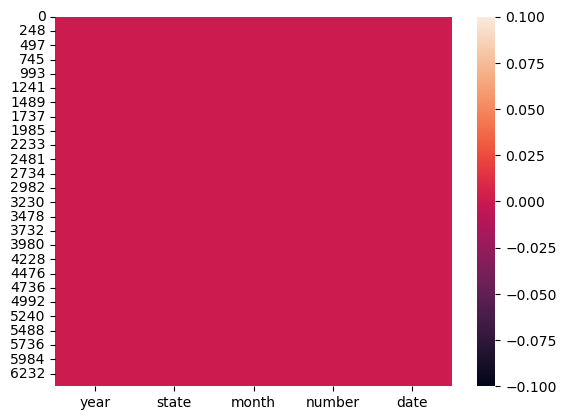

In [11]:
sns.heatmap(df.isnull())
plt.show()

### 7. Get Overall Statistics About The Dataframe

In [12]:
df.describe()

,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


In [13]:
# for all the columns
df.describe(include='all', datetime_is_numeric=True)

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


### 8. Rename Month Names To English

In [14]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [15]:
df['month_new']=df['month'].map({'Janeiro':'January',
                                    'Fevereiro':'February',
                                    'Março':'March',
                                    'Abril':'April',
                                    'Maio':'May',
                                    'Junho':'June',
                                    'Julho':'July',
                                    'Agosto':'August',
                                    'Setembro':'September',
                                    'Outubro':'October',
                                    'Novembro':'November',
                                    'Dezembro':'December'
                                   })

In [16]:
df.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,January
1,1999,Acre,Janeiro,0.0,1999-01-01,January
2,2000,Acre,Janeiro,0.0,2000-01-01,January
3,2001,Acre,Janeiro,0.0,2001-01-01,January
4,2002,Acre,Janeiro,0.0,2002-01-01,January


### 9. Total Number of Fires Registered

In [17]:
len(df)

6422

### 10. In Which Month Maximum Number of Forest Fires Were Reported?

In [18]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [19]:
df1 = df.groupby('month_new')['number'].sum().reset_index()
df1

,month_new,number
0,April,28184.770
1,August,88050.435
2,December,57535.480
3,February,30839.050
4,January,47681.844
5,July,92319.113
6,June,55997.675
7,March,30709.405
8,May,34725.363
9,November,85508.054


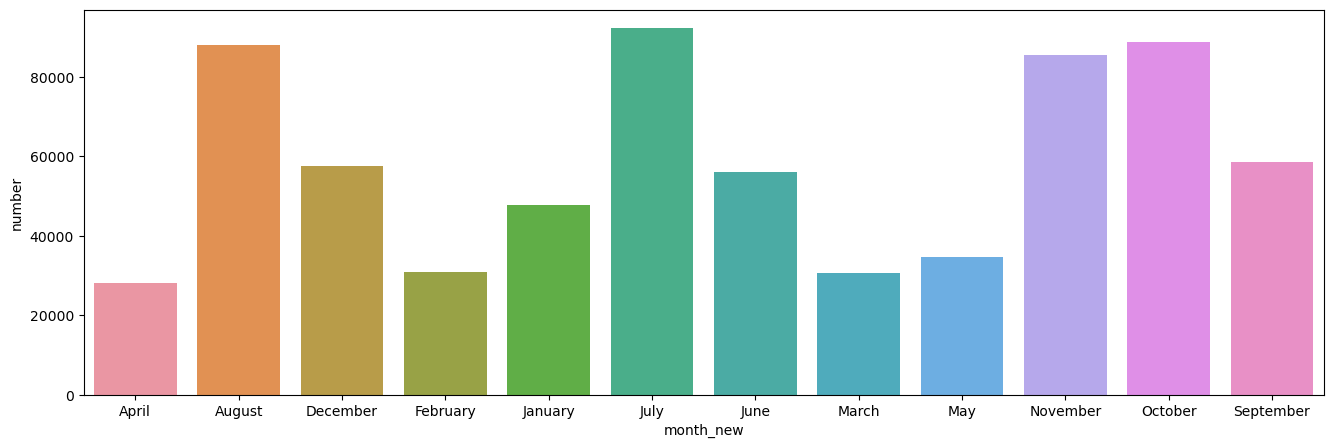

In [20]:
plt.figure(figsize=(16,5))
sns.barplot(x="month_new",y="number",data=df1)
plt.show()

### 11. In Which Year Maximum Number of Forest Fires Was Reported?

In [21]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [22]:
df2 = df.groupby('year')['number'].sum().reset_index()
df2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


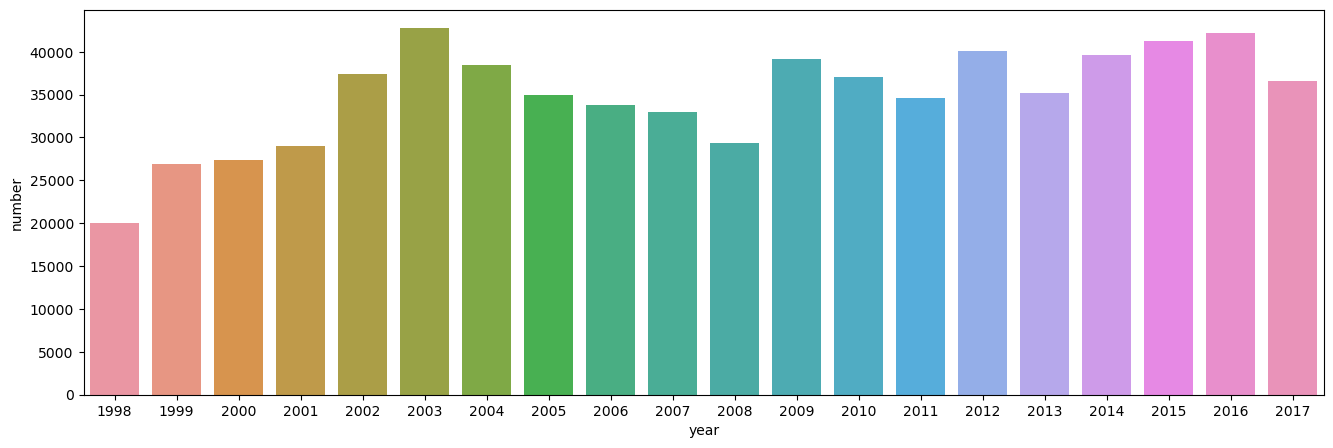

In [23]:
plt.figure(figsize=(16,5))
sns.barplot(x="year",y="number",data=df2)
plt.show()

### 12. In Which State Maximum Number of Forest Fires Was Reported?

In [24]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [25]:
df3 = df.groupby('state')['number'].sum().reset_index()
df3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


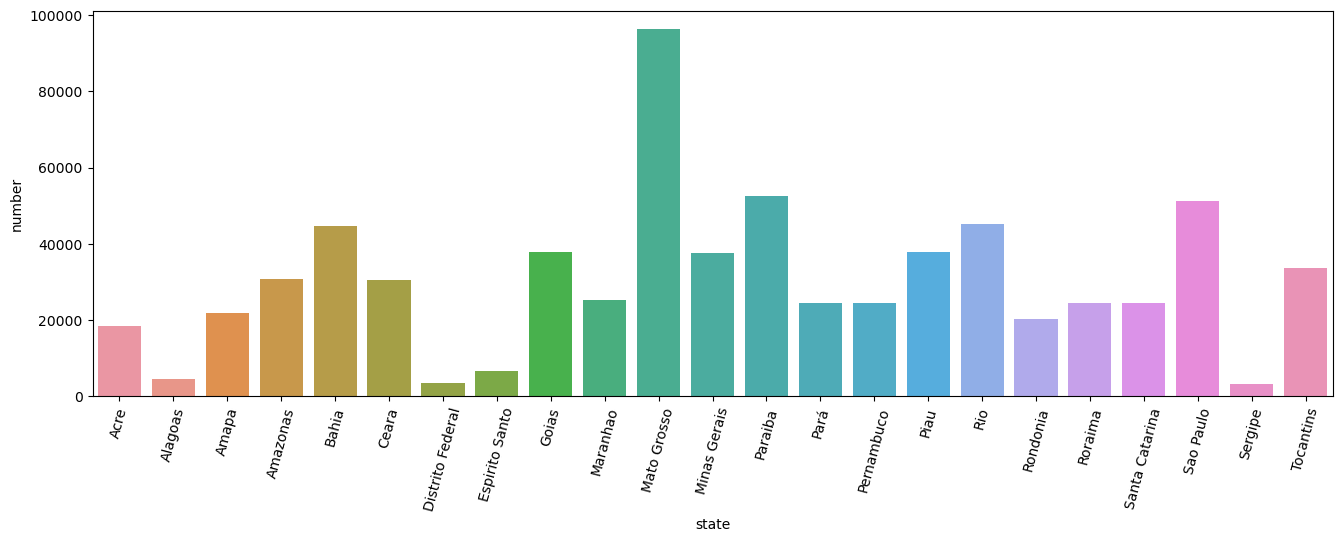

In [26]:
plt.figure(figsize=(16,5))
sns.barplot(x="state",y="number",data=df3)
plt.xticks(rotation=75)
plt.show()

### 13. Find Total Number of Fires Were Reported In Amazonas

In [27]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [28]:
df[df['state']=="Amazonas"]['number'].sum()

30650.129

### 14. Display Number of Fires Were Reported In Amazonas (Year-Wise)

In [29]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [30]:
df4 = df[df['state']=="Amazonas"]
df5= df4.groupby('year')['number'].sum().reset_index()
df5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


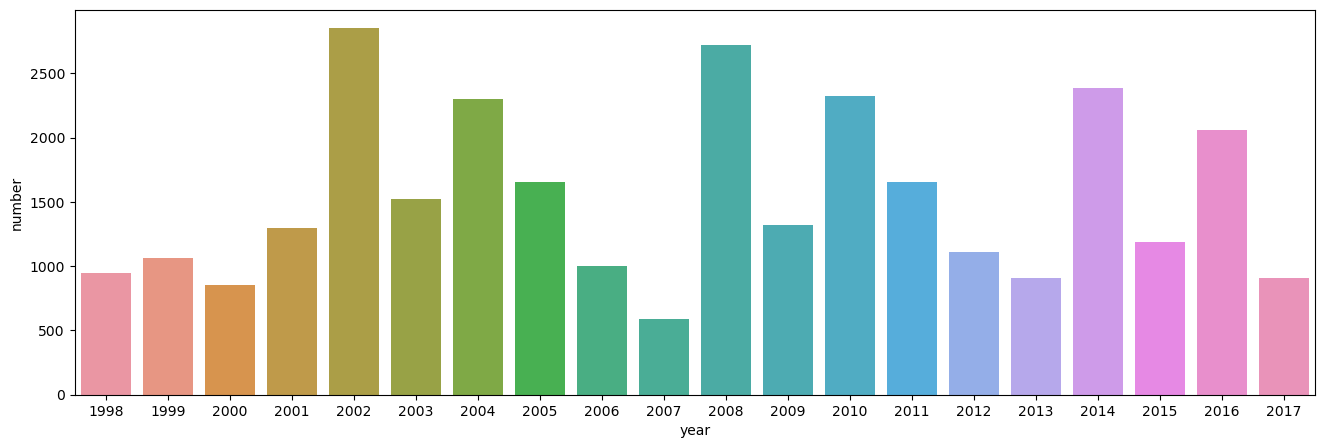

In [31]:
plt.figure(figsize=(16,5))
sns.barplot(x="year",y="number",data=df5)
plt.show()

### 15. Display Number of Fires Were Reported In Amazonas (Day-Wise)

In [32]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [33]:
df4.head()

,year,state,month,number,date,month_new
718,1998,Amazonas,Janeiro,0.0,1998-01-01,January
719,1999,Amazonas,Janeiro,3.0,1999-01-01,January
720,2000,Amazonas,Janeiro,7.0,2000-01-01,January
721,2001,Amazonas,Janeiro,3.0,2001-01-01,January
722,2002,Amazonas,Janeiro,17.0,2002-01-01,January


In [34]:
day=df4.groupby(df4['date'].dt.dayofweek).sum().number

import calendar

day.index = [calendar.day_name[x] for x in range(0,7)]
day= day.reset_index()

In [35]:
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


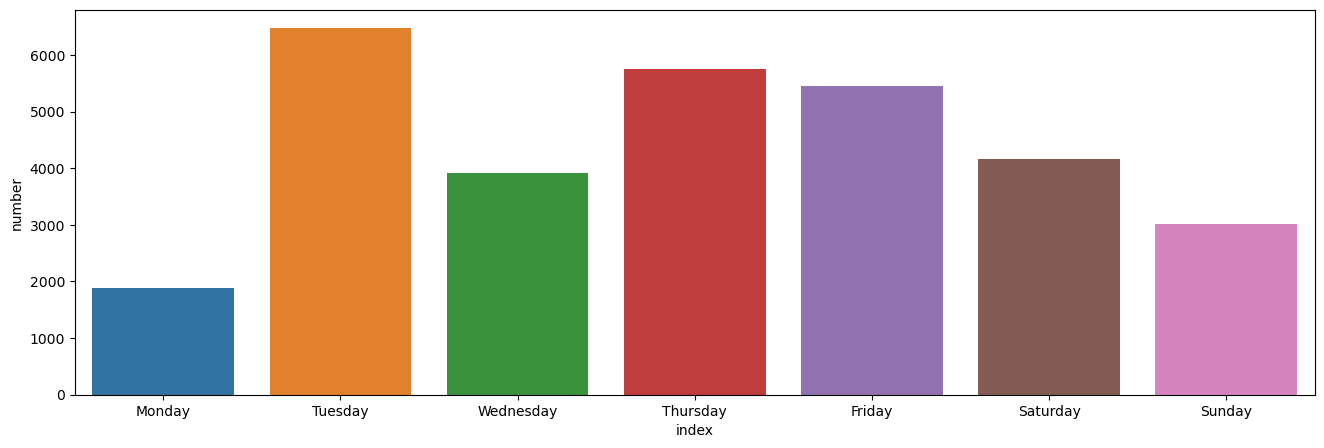

In [36]:
plt.figure(figsize=(16,5))
sns.barplot(x="index",y="number",data=day)
plt.show()

### 16. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’

In [37]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [38]:
fire = df[df['year']==2015].groupby('month_new')['number'].sum().reset_index()

In [39]:
fire

,month_new,number
0,April,2573.000
1,August,4363.125
2,December,4088.522
3,February,2309.000
4,January,4635.000
5,July,4364.392
6,June,3260.552
7,March,2202.000
8,May,2384.000
9,November,4034.518


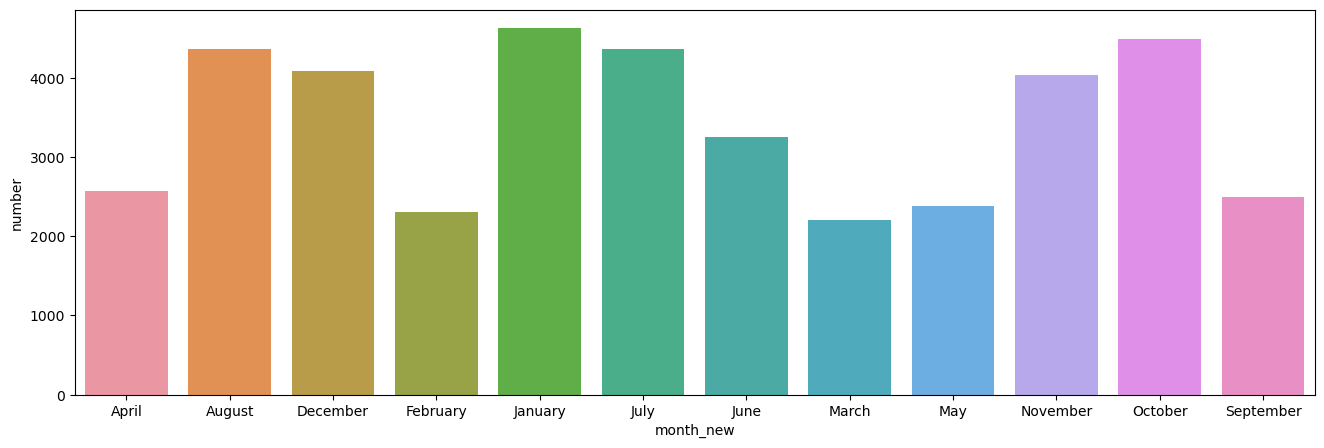

In [40]:
plt.figure(figsize=(16,5))
sns.barplot(x="month_new",y="number",data=fire)
plt.show()

### 17. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)

In [41]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [42]:
avg_fire = df.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
avg_fire

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


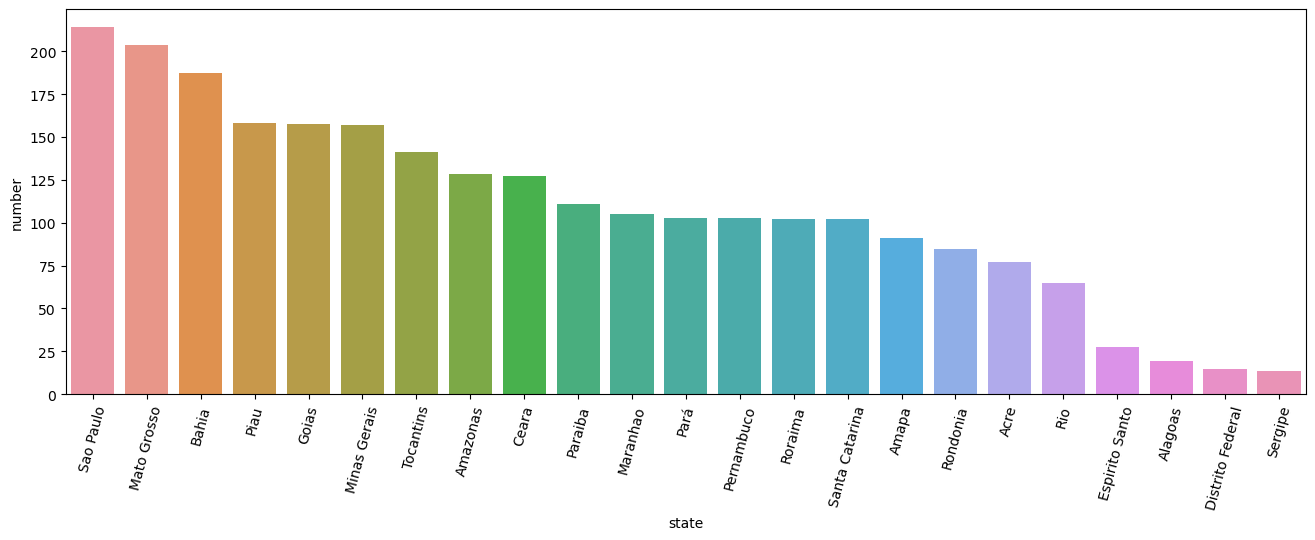

In [43]:
plt.figure(figsize=(16,5))
sns.barplot(x="state",y="number",data=avg_fire)
plt.xticks(rotation=75)
plt.show()

### 18.  To Find The State Names Where Fires Were Reported In 'dec' Month

In [44]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [45]:
df[df['month_new']=="December"]['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)